<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/Anomaly_detection_%7C_dealing_with_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('ggplot')

In [32]:
from google.colab import files
file = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [33]:
df = pd.read_csv("BankChurners.csv")

In [ ]:
df.head()

In [110]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1,N_B_Flag2
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


## **Renaming columns using a mapping:**
`df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]});`
`df.rename(columns={"A": "a", "B": "c"})`
[Reference>>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [36]:
df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "N_B_Flag1"}, inplace=True)

In [ ]:
df.head()

# PCA Dimentionality reduction to prject scatter data on 2D plot to find outliers

**Seperating Numerical columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [38]:
nm_df = df.iloc[:,[2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21]]

In [39]:
nm_df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191
10123,41,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270
10124,44,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880
10125,30,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710


In [40]:
df['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1])

In [ ]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

### **Let Define a Target Y**

In [86]:
# Y = df.loc[:, 'Dependent_count'].values # all rows in col: Dependent_count
Y = df.Dependent_count

In [98]:
type(Y)

numpy.ndarray

In [95]:
# Y = Y.to_numpy(dtype=int, copy=True)

In [97]:
Y

array([3, 5, 3, ..., 1, 2, 2])

## To prepare data for PCA we hve to scale it first:

Although pca center the dataset by itself, but it is always a good practice
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [42]:
scalar = StandardScaler()
scalar.fit(nm_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scale_nm_df = scalar.transform(nm_df)

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [44]:
print(scalar.mean_)
print(scale_nm_df)

[4.63259603e+01 3.59284092e+01 3.81258023e+00 2.34116718e+00
 2.45531747e+00 8.63195370e+03 1.16281406e+03 7.46913964e+03
 7.59940654e-01 4.40408630e+03 6.48586946e+01 7.12222376e-01
 2.74893552e-01 1.59997464e-01]
[[-1.65405580e-01  3.84620878e-01  7.63942609e-01 ...  3.83400260e+00
  -7.75882235e-01 -4.37753814e-01]
 [ 3.33570383e-01  1.01071482e+00  1.40730617e+00 ...  1.26085729e+01
  -6.16275655e-01 -4.37853975e-01]
 [ 5.83058365e-01  8.96451285e-03  1.20579050e-01 ...  6.80786367e+00
  -9.97154993e-01 -4.37951926e-01]
 ...
 [-2.90149571e-01  8.96451285e-03  7.63942609e-01 ...  4.44305026e-01
  -9.97154993e-01  2.29379027e+00]
 [-2.03656544e+00  8.96451285e-03  1.20579050e-01 ...  4.10696270e-02
  -9.97154993e-01  2.29058727e+00]
 [-4.14893562e-01 -1.36844216e+00  1.40730617e+00 ... -2.65557291e-01
  -3.11572183e-01  2.29034089e+00]]


### Applying PCA on scaled data

In [45]:
pca = PCA(n_components=3)
# n_components = 2 means we want to reduce 4 dimentional data into 2 dimention

In [46]:
pca.fit(scale_nm_df) #we are fitting or projecting scalled data onto 3d plane

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Shape of our scaled data size

In [47]:
scale_nm_df.shape

(10127, 14)

In [48]:
x_pca = pca.transform(scale_nm_df)

In [49]:
x_pca

array([[ 0.28386313, -0.30903431,  0.30449443],
       [-0.60294445, -2.8663589 , -0.67140461],
       [-0.59720715, -2.22923115,  0.21839722],
       ...,
       [ 0.65914488,  1.24819543,  0.64668094],
       [ 0.68549677,  1.26034768,  1.69151981],
       [ 0.41015095,  0.42679687,  1.42332893]])

Data size after reducing the dimention using PCA

In [50]:
x_pca.shape

(10127, 3)

## PCA 2D

In [71]:
pca2d = PCA(n_components=2)
pca2d.fit(scale_nm_df)
x_pca2 = pca.transform(scale_nm_df)

Creating Lagends

In [107]:
Dependent_count = ['a', 'b', 'c', 'd', 'e', 'f'] # we let this category name, bcoz dataset doesn't provide any!
# Converting the python list: Dependent_count to numpy array
Dependent_count = np.array(Dependent_count)

In [108]:
print(np.unique(Y))

[0 1 2 3 4 5]


Plottng the principal Components

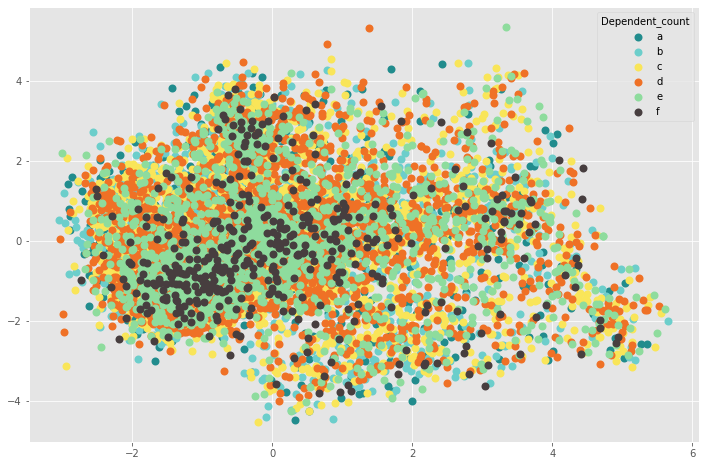

In [132]:
colors = ['#218C8D', '#6CCECB', '#F9E559', '#EF7126', '#8EDC9D', '#473E3F']

plt.figure(figsize=(12,8))
# scatter = plt.scatter(x_pca2[:,0], x_pca2[:,1], c=Y, labels=Dependent_count)

for color, i, dependent in zip(colors, [0, 1, 2, 3, 4, 5], Dependent_count):
    plt.scatter(x_pca[Y==i, 0], x_pca[Y==i, 1], alpha=1, lw=2,
                label=dependent, color=color)

#plt.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=Y, labels=Dependent_count)
# labels = np.unique(Y)

"""
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
"""

# plt.legend(handles, labels, title='Dependent_count')

plt.legend(loc='best', shadow=False, scatterpoints=1, title='Dependent_count')

#plt.axhline(0, color='b')
#plt.axvline(0, color='b')
plt.show()

isolation Forest is most suitable for detecting anomaly or outliers in higher dimentional data.

## PCA 3D

[plotly.express.scatter_3d](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [ ]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

#px.scatter_3d(x = "x_pca[:,0]", y = "x_pca[:,1]",z = "x_pca[:,2]", data_frame= x_pca, color= Y)
px.scatter_3d(x_pca, x_pca[:,0], x_pca[:,1], x_pca[:,2], color= Y)

In [ ]:
type(x_pca[:,0])

numpy.ndarray

# **Scatter plot with appropriate [Lagends]**

In [8]:
#@title
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Loading iris dataset from sklearn datasets Modules

In [11]:
#@title
iris = datasets.load_iris()
X = iris.data
y = iris.target
#target_names = iris.target_names

In [27]:
#@title
type(target_names) #numpy.ndarray
species = ['setosa', 'versicolor', 'virginica']
type(species) #type: python list

list

In [104]:
#@title
print(type(y))
y

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## **Converting Python-list to numpy-array**
[Ref>>](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

In [28]:
#@title
species = np.array(species)

In [25]:
#@title
type(species)

numpy.ndarray

In [29]:
#@title
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
#@title
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

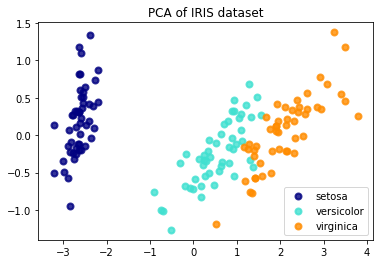

In [30]:
#@title
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, specis in zip(colors, [0, 1, 2], species):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=specis)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

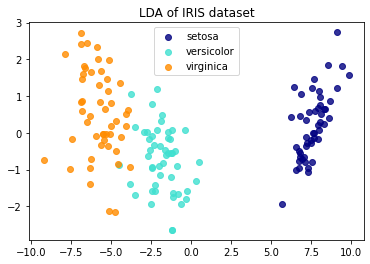

In [20]:
#@title
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [ ]:
#@title


# **Box plot, Normal Distribution, Correlation**

In [133]:
import seaborn as sns

In [139]:
nm_df.index

RangeIndex(start=0, stop=10127, step=1)

In [ ]:
corrmat=nm_df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(16,16)) 
#plot heat map 
g=sns.heatmap(nm_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can drop any feature that are highly correlated to reduce the dimentionality of the dataset. This will allow a machine learning model to predict with better accurecy.

## Find the ***Important Features*** in the dataset

In [140]:
from sklearn.ensemble import ExtraTreesRegressor

In [142]:
find_imp_ft_model = ExtraTreesRegressor()
find_imp_ft_model.fit(nm_df, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [143]:
print(find_imp_ft_model.feature_importances_)

[0.31497602 0.09550662 0.04761562 0.04353273 0.04714254 0.04527455
 0.04784102 0.0444772  0.05632138 0.04967878 0.05312646 0.06003064
 0.04349857 0.05097787]


So here the feature importance score has been shown as column index order. Such as the Customer_Age feature has 31% importance to predict the target Y, and so on..

In [145]:
nm_df.head(2)

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057


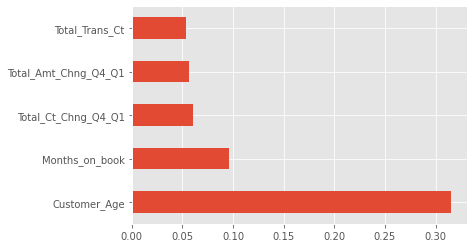

In [147]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(find_imp_ft_model.feature_importances_, index=nm_df.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()